# TP -  Introduction to Pytorch


## Tensors, Back-propagation, Hand-written digit recognition,  Language modeling
*************************************************************

**Recommended Reading:**

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

## Tensors

In [3]:
import torch

a = torch.FloatTensor(2, 3)
print(a)
print(a.mean())


 0.0000e+00  8.5899e+09  2.9734e-29
-2.5250e-29  9.1838e-41  0.0000e+00
[torch.FloatTensor of size 2x3]

1431655765.3333333


### are Numpy arrays inside

In [4]:
a_ = a.numpy()
a_[0, 1] = 0.

print(a)


1.00000e-29 *
  0.0000  0.0000  2.9734
 -2.5250  0.0000  0.0000
[torch.FloatTensor of size 2x3]



## Variables

In [5]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2))
print(x)
print(x.mean())

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 1
[torch.FloatTensor of size 1]



### are Tensors inside

In [6]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



### with automatic differentiation !

In [7]:
x.requires_grad=True

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

In [8]:
print(x.grad)

error = (10 - z).mean()
error.backward()

print(x.grad)

None
Variable containing:
-4.5000 -4.5000
-4.5000 -4.5000
[torch.FloatTensor of size 2x2]



# Back-propagation: example

On calcule les gradients $\frac{\partial L(y - h(x))}{\partial w}$ et $\frac{\partial L(y - h(x))}{\partial b}$, avec:
 - $h(x) = \sigma(w*x + b)$
 - $\sigma$ est la fonction logistique (sigmoid)
 - $L(y, \hat{y}) = (y - \hat{y})^2$ (erreur quadratique)
 - $y = 0.2$
 - $x = 1.5$
 - $b = -2$
 - $w = 3$

In [9]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)
h = torch.sigmoid(w * x + b)
error = (y - h)**2
error.backward()

print(h.data[0])
print(w.grad.data[0])
print(b.grad.data[0])

0.9241418242454529
0.1522950828075409
0.101530060172081


In [10]:
torch.sigmoid(Variable(torch.Tensor([6,4,5])))

Variable containing:
 0.9975
 0.9820
 0.9933
[torch.FloatTensor of size 3]

On minimize $L(y - h(x))$ pas à pas:

In [11]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

alphas = [0.01, 0.1, 1, 10, 100]
result = []
for alpha in alphas:
    for i in range(100):
        h = torch.sigmoid(w * x + b)
        error = (y - h)**2
        error.backward()

        w.data.sub_(alpha * w.grad.data)
        w.grad.data.zero_()  # must reset to 0 before next pass

        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass

        #print('Epoch {} h={:.05f} w={:.05f} b={:.05f}'.format(i+1, h.data[0], w.data[0], b.data[0]))
        event = {"alpha":alpha, "h":h.data[0],"w": w.data[0],"b": b.data[0] }
    result.append(event)

    

Essayez différentes valeurs pour le paramètre alpha: 0.01, 0.1, 1, 10, 100. Que constatez-vous ?

In [12]:
result

[{'alpha': 0.01,
  'b': -2.1157619953155518,
  'h': 0.8936006426811218,
  'w': 2.8263566493988037},
 {'alpha': 0.1,
  'b': -3.117934465408325,
  'h': 0.2445417046546936,
  'w': 1.323098063468933},
 {'alpha': 1,
  'b': -3.195782423019409,
  'h': 0.2000001072883606,
  'w': 1.206325888633728},
 {'alpha': 10,
  'b': -3.195782423019409,
  'h': 0.20000000298023224,
  'w': 1.2063254117965698},
 {'alpha': 100,
  'b': -3.195782423019409,
  'h': 0.20000000298023224,
  'w': 1.2063254117965698}]

# A vous de jouer !

Voici un jeu de données synthetique.

In [13]:
import numpy as np
import torch

np.random.seed(1337)

X_ = np.concatenate((
    np.random.random(
        size=(5000, 2)) - 0.5,
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))),
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))),
))

Y_ = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

X_ = np.asarray(X_, dtype='float32')
Y_ = np.asarray(Y_, dtype='float32')

# shuffle data points
perm = np.random.permutation(X_.shape[0])
X_ = X_[perm]
Y_ = Y_[perm]

# numpy arrays -> torch tensors
torch.manual_seed(1337)

X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

On crée deux jeux séparés: train / test.

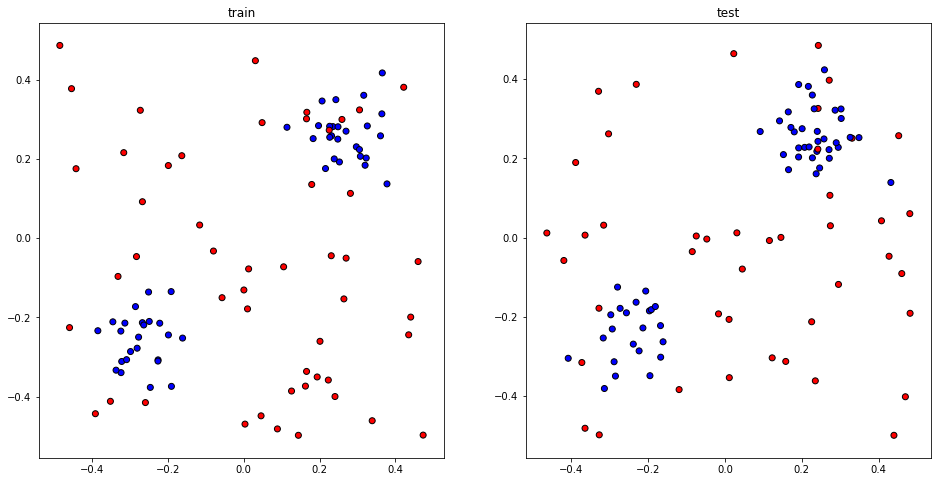

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# train / test split
n_train = 100
n_test = 100

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Implémentez un réseau de neurones sans couche cachée, qui prends en entrée $\mathbf{x} \in \mathbb{R}^2$ et produit une seule sortie $\mathbf{y} \in [0, 1]$ (sigmoid).

Multiplication de matrics: torch.matmul

Interdiction d'utiliser les modules haut niveau de pytorch ! (optim, nn etc.)

In [15]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(10)

n_in = 2
params = []

n_train = 100

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)
b = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    global W, b
    
    H = torch.sigmoid(torch.add(torch.matmul(X, W), b))
    
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 10
train_batch_size = 10
alpha = 0.0001

for i in range(n_epochs):
    train_loss = 0.
    
    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = torch.mean(L(Y_prob_mb, Y_mb))
        
        loss.backward()

        # Backward pass
        W.data.sub_(alpha * W.grad.data)
        W.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass
        

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    #print('Epoch {:03d}\ttrain loss={}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        #i + 1, train_loss, test_loss, test_err))

Visualisez la distribution apprise par votre modèle:

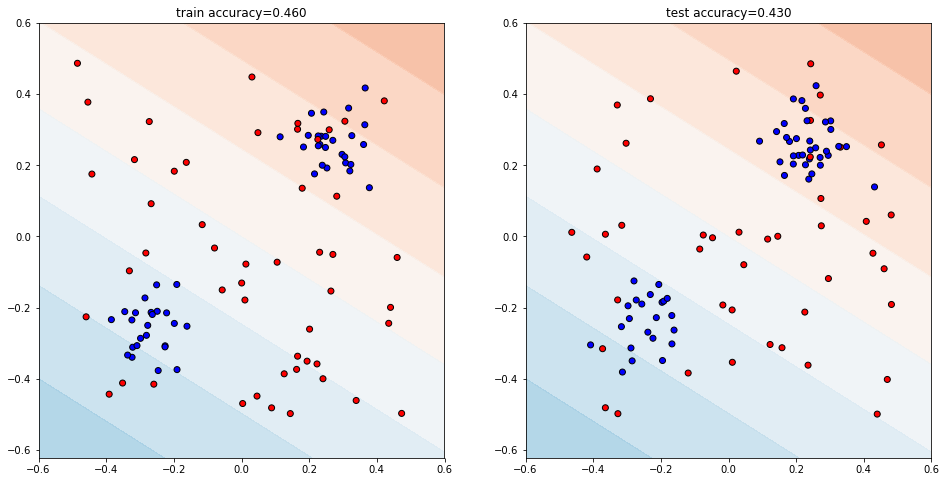

In [16]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Ajoutez une couche cachée de taille 10 à votre réseau de neurones, avec la fonction d'activation relu.

Bonus: améliorez votre réseau de neurones: plus de neurones cachés, deuxième couche cachée etc.

Définition de la focntion d'acivation relu

In [20]:
class MyReLU(torch.autograd.Function):
   """
   We can implement our own custom autograd Functions by subclassing
   torch.autograd.Function and implementing the forward and backward passes
   which operate on Tensors.
   """

   def forward(self, inpute):
       """
       In the forward pass we receive a Tensor containing the input and return a
       Tensor containing the output. You can cache arbitrary Tensors for use in the
       backward pass using the save_for_backward method.
       """
       self.save_for_backward(inpute)
       return inpute.clamp(min=0)

   def backward(self, grad_output):
       """
       In the backward pass we receive a Tensor containing the gradient of the loss
       with respect to the output, and we need to compute the gradient of the loss
       with respect to the input.
       """
       inpute, = self.saved_tensors
       grad_input = grad_output.clone()
       grad_input[inpute < 0] = 0
       return grad_input


In [47]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(10)

n_in = 2
params = []

n_train = 100
n_intermediaire = 4
n_out = 1

W1 = Variable(torch.normal(torch.zeros(n_in, n_intermediaire), np.sqrt(2/(n_in + n_out))), requires_grad=True)
W2 = Variable(torch.normal(torch.zeros(n_intermediaire, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)

### Ajout d'une couche cachée (W2)


b1 = Variable(torch.zeros(n_intermediaire), requires_grad=True)
b2 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    global W1, W2, b1, b2
    
    relu = MyReLU()
    H1 = relu(torch.add(torch.matmul(X, W1), b1))
    #H1 = torch.sigmoid(torch.add(torch.matmul(X, W1), b1))
    H2 = torch.sigmoid(torch.add(torch.matmul(H1, W2), b2))
    #H2 = torch.sigmoid(torch.add(torch.matmul(H1, W2), b2))
    return H2
### Utilisation de deux fonctions d'activation.
### Relu puis sigmoïde. Si on fait l'inverse, c'est une catastrophe.

def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 550
epoch_n_batches = 10
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = torch.mean(L(Y_prob_mb, Y_mb))
        
        loss.backward()
        
        W1.data.sub_(alpha * W1.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass
    
        b1.data.sub_(alpha * b1.grad.data)
        b1.grad.data.zero_()  # must reset to 0 before next pass
               
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass
    
        b2.data.sub_(alpha * b2.grad.data)
        b2.grad.data.zero_()  # must reset to 0 before next pass
        

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()



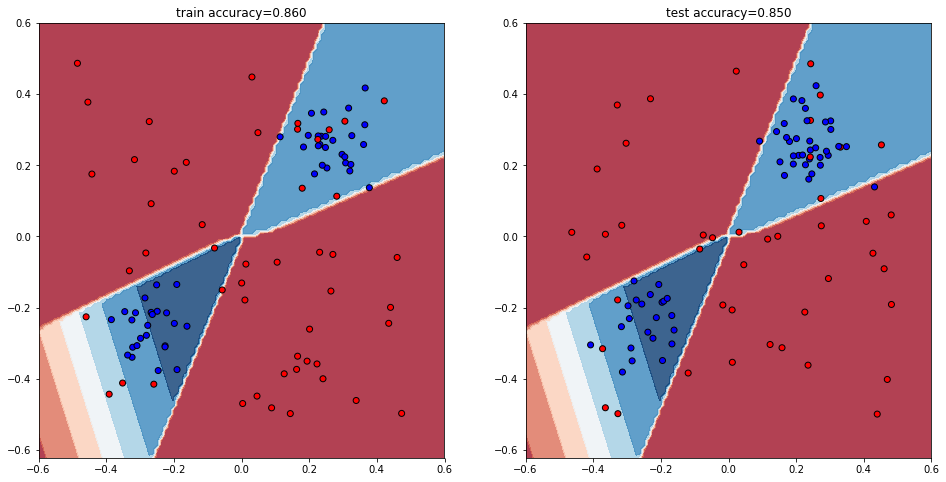

In [48]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

On améliore sensiblement les performances. Le modèle reste simple, il ne semble pas avoir sur appris.